In [2]:
import argparse
import os
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import re

In [3]:
from readers.topreader import TopReader
from plotters.histoplotter import HistoPlotter

""" 
Options for key_1:

histogram_transverse_momentum_j1
histogram_transverse_momentum_j2
histogram_transverse_momentum_h1
histogram_transverse_momentum_jjh
histogram_invariant_mass_mjj12
histogram_rapidity_j1j2
histogram_rapidity_j1
histogram_rapidity_j2
histogram_rapidity_h1



Options for key_2:

ptj1
ptj2
mjj
yjj
ptH
ptHjj
yj1
yj2
yH
"""

#key_to_plot_1 = "histogram_Mjj_pTH_truth_Mjj_vs_pTH"
#keys_to_plot_2 = ["MJJ-PTH-0-80-PTJ-","MJJ-PTH-80-120-PTJ-","MJJ-PTH-120-260-PTJ-",
#                  "MJJ-PTH-260-500-PTJ-","MJJ-PTH-500-850-PTJ-","MJJ-PTH-850-INFTY-PTJ-"]

#key_to_plot_1 = "histogram_Mjj_Dphijj_truth_Mjj_vs_Dphijj"
#keys_to_plot_2 = ["MJJ-DPHIJJ-0-PIov4-PTJ-", "MJJ-DPHIJJ-PIov4-PIov2-PTJ-", 
#                  "MJJ-DPHIJJ-PIov2-3PIov4-PTJ-", "MJJ-DPHIJJ-3PIov4-PI-PTJ-"]

#key_to_plot_1 = "histogram_Mjj_Dyjj_truth_Mjj_vs_Dyjj"
#keys_to_plot_2 = ["MJJ-DYJJ-2-4-PTJ-", "MJJ-DYJJ-4-5-PTJ-","MJJ-DYJJ-5-6-PTJ-","MJJ-DYJJ-6-7-PTJ-","MJJ-DYJJ-7-INFTY-PTJ-"]

key_to_plot_1 = "histogram_pTH_Dyjj_truth_pTH_vs_Dyjj"
keys_to_plot_2 = ["PTH-DYJJ-2-4-PTJ-","PTH-DYJJ-4-5-PTJ-","PTH-DYJJ-5-6-PTJ-","PTH-DYJJ-6-7-PTJ-","PTH-DYJJ-7-INFTY-PTJ-"]

setup_pTj = "30"
setup2a2b = "setup.2.b"

if setup2a2b == "STXS":
    proVBF_setup = "stxs"
else:
    proVBF_setup = "histo"
merge_DPhijj_pTHjj=False

In [4]:
# read the text file of the binning


with open("./MoCaNLO_STXS_binning.txt", 'r') as file:
    lines = file.readlines()  # Reads all lines into a list

STXS_bin_names = []
for line in lines:
    if line=="\n" or "#" in line: 
        continue
    new_line = line.strip("\n")
    new_line = new_line.split(".")[1].strip()
    STXS_bin_names.append(new_line)
print(STXS_bin_names)

key_to_plot_1 = "histogram_Mjj_pTH_STSX_truth_Mjj_vs_pTH_STSX"
keys_to_plot_2 = STXS_bin_names

setup_pTj = ""
setup2a2b = "STXS"

if setup2a2b == "STXS":
    proVBF_setup = "stxs"
else:
    proVBF_setup = "histo"
merge_DPhijj_pTHjj = True
# get the proVBF list into keys_to_plot_2

# perform the merge of pTHjj and DPhijj for MoCaNLO and proVBF together



['STXS-MJJ-350-700-PTH-0-200-PTHJJ-0-25-DPHIJJ-0-PIov2', 'STXS-MJJ-700-1000-PTH-0-200-PTHJJ-0-25-DPHIJJ-0-PIov2', 'STXS-MJJ-1000-1500-PTH-0-200-PTHJJ-0-25-DPHIJJ-0-PIov2', 'STXS-MJJ-1500-INFTY-PTH-0-200-PTHJJ-0-25-DPHIJJ-0-PIov2', 'STXS-MJJ-350-700-PTH-200-INFTY-PTHJJ-0-25-DPHIJJ-0-PIov2', 'STXS-MJJ-700-1000-PTH-200-INFTY-PTHJJ-0-25-DPHIJJ-0-PIov2', 'STXS-MJJ-1000-1500-PTH-200-INFTY-PTHJJ-0-25-DPHIJJ-0-PIov2', 'STXS-MJJ-1500-INFTY-PTH-200-INFTY-PTHJJ-0-25-DPHIJJ-0-PIov2', 'STXS-MJJ-350-700-PTH-0-200-PTHJJ-0-25-DPHIJJ-PIov2-PI', 'STXS-MJJ-700-1000-PTH-0-200-PTHJJ-0-25-DPHIJJ-PIov2-PI', 'STXS-MJJ-1000-1500-PTH-0-200-PTHJJ-0-25-DPHIJJ-PIov2-PI', 'STXS-MJJ-1500-INFTY-PTH-0-200-PTHJJ-0-25-DPHIJJ-PIov2-PI', 'STXS-MJJ-350-700-PTH-200-INFTY-PTHJJ-0-25-DPHIJJ-PIov2-PI', 'STXS-MJJ-700-1000-PTH-200-INFTY-PTHJJ-0-25-DPHIJJ-PIov2-PI', 'STXS-MJJ-1000-1500-PTH-200-INFTY-PTHJJ-0-25-DPHIJJ-PIov2-PI', 'STXS-MJJ-1500-INFTY-PTH-200-INFTY-PTHJJ-0-25-DPHIJJ-PIov2-PI', 'STXS-MJJ-350-700-PTH-0-200-PTHJJ-25-IN

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter, ScalarFormatter
import matplotlib.cm as cm

def parse_value(value):
        """Convert specific string values to LaTeX formatted math symbols."""
        if value == 'INFTY':
            return r'$\infty$'
        elif value == 'PI':
            return r'$\pi$'
        elif value == '2PI':
            return r'$2\pi$'
        elif value == 'PIov2':
            return r'$\frac{\pi}{2}$'
        elif value == 'PIov4':
            return r'$\frac{\pi}{4}$'
        elif value == '3PIov2':
            return r'$\frac{3\pi}{2}$'
        else:
            # Handle numerical values as strings
            return value

def format_with_sigfigs(x, pos):
        significant_figures = 3
        # Using Python string formatting to format numbers with significant figures
        return f"{x:.{significant_figures}g}"

def get_bigstxs_complex_histogram_histogramlike(data, reference_list, label_mapping, cut_off_val_min, cut_off_val_max, offset=10, figsize=(10,12),custom_color_map = None,settings={}):
        """
        Takes reference_list which represents plotting order
        
        Returns plt.figure
        
        """
        # Function to format numbers with a specific number of significant figures
        def format_with_sigfigs(x, sigfigs):
            if x == 0:
                return f"0.{'0' * (sigfigs - 1)}"
            else:
                return f"{x:.2f}"
        
        number_of_plots = len(reference_list)
        # Check is the error bar is correctly computed
        fig, axes = plt.subplots(number_of_plots, 1, sharex=True, figsize=figsize, gridspec_kw = {'wspace':0, 'hspace':0})
        x_param = data['x_param']
        # ax1.set_ylabel('Value')
        if len(x_param.split('[')) > 1:
            axes[0].set_title(f"$d\\sigma/d${x_param.split('[')[0]} [pb/{x_param.split('[')[1].split(']')[0]}]")
        else:
            axes[0].set_title(f"$d\\sigma/d${x_param} [pb]")
        
        formatter = ScalarFormatter(useOffset=False)
        formatter.set_scientific(True)
        formatter.set_powerlimits((-3, 3))  # Always use scientific notation
        axes[0].yaxis.set_major_formatter(formatter) # Scientific notation
        axes[0].set_yscale('log')  # Set logarithmic scale for the y-axis
        axes[0].grid(True, which='major', linestyle='--', linewidth=0.5)  # Add grid to the first subplot
        axes[0].tick_params(axis='x', direction='in', which='both', length=6)  # Set tick direction to inward
        axes[0].tick_params(axis='y', direction='in', which='both')  # Set tick direction to inward
    
        axes[-1].set_xlabel(x_param)
        # ax2.set_ylabel('Value / Reference')
        for ind, ax2 in enumerate(axes):
            if ind != 0:
                ax2.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid to the second subplot
                ax2.tick_params(axis='x', direction='in', which='both', length=6)  # Set tick direction to inward
                ax2.tick_params(axis='y', direction='in', which='both', length=6)  # Set tick direction to inward
    
        # Making y labels and setting y limit
        for i, lab in enumerate(reference_list):
            # Apply the formatter to the y-axis for consistent significant figures
            if i != 0:
                axes[i].yaxis.set_major_formatter(FuncFormatter(format_with_sigfigs))
            # Set y-axis scale if specified
            if "y_scale" in lab:
                axes[i].set_ylim(lab["y_scale"])
            try:
                label = lab["label"]
            except:
                continue
            labelpad = 31
            axes[i].set_ylabel(label, labelpad=labelpad)


        # Define color palette
        color_mapping = list(label_mapping.keys())
        print(color_mapping)
        NUM_COLORS = len(color_mapping)
        color_palette = cm.get_cmap('tab20', NUM_COLORS)
        x_to_plot = None

        for ind, ref in enumerate(reference_list):
            # Extracting data for ind plot
            index_list = ref["data_ind"]
            reference_index = ref.get("reference_ind")
            list_of_errors = ref.get("list_of_errors", [])
            error_bands = ref.get("error_bands", False)
            horizontal_line = ref.get("horizontal_line", False)
            plot_label_for_ref = ref.get("plot_label_for_reference", False)
            filtered_data = {key: data['data'][key] for key in index_list if key in data['data']}

            if horizontal_line:
                axes[ind].axhline(y=1, color='black', linestyle='-', linewidth=0.5)

            for i, (histo_name, histo_data) in enumerate(filtered_data.items()):
                # Filter histo_data based on cut-off values
                histo_data_cut_off = [
                    entry for entry in histo_data
                    if entry[0] >= cut_off_val_min and entry[1] <= cut_off_val_max
                ]
                #histo_data_cut_off = histo_data[cut_off_val_min:cut_off_val_max]
                length = len(histo_data_cut_off)
                color = color_palette(color_mapping.index(histo_name))  # Get color from the palette
                if custom_color_map:
                    color = custom_color_map[histo_name]
                x = [(start + end) / 2 + i * offset for start, end, _, _, _ in histo_data_cut_off]
                x_to_plot = x
                y = [value for _, _, value, _, _ in histo_data_cut_off]

                if not reference_index:
                    color = color_palette(color_mapping.index(histo_name))  # Get color from the palette
                    if custom_color_map:
                        color = custom_color_map[histo_name]
                    x = [(start + end) / 2 + i * offset for start, end, _, _, _ in histo_data_cut_off]
                    y = [value for _, _, value, _, _ in histo_data_cut_off]
                    yerr_low = [error for _, _, _, error, _ in histo_data_cut_off]
                    yerr_high = [error for _, _, _, _, error in histo_data_cut_off]
                    axes[ind].plot([],[],color=color, label=label_mapping[histo_name])
                    # Plot histogram bars
                    for i, (start, end, value, error_low, error_high) in enumerate(histo_data_cut_off):
                        mid = (start + end) / 2
                        width = end - start
                        axes[ind].hlines(y=value, xmin=start, xmax=end, color=color, linestyle='-')

                        # Add shaded regions to represent error bars
                        if error_bands and histo_name not in list_of_errors:
                            axes[ind].bar(mid, error_high + error_low, width=width, bottom=value - error_low, color=color, alpha=0.8, align='center')
                        elif histo_name in list_of_errors:
                            axes[ind].errorbar(mid, value, yerr=([error_low], [error_high]), fmt='none', ecolor=color, elinewidth=2, capsize=3)


                    # Add vertical lines between the right edge of one bar to the left edge of the next
                    for i in range(len(histo_data_cut_off) - 1):
                        _, end_current, value_current, _, _ = histo_data_cut_off[i]
                        start_next, _, value_next, _, _ = histo_data_cut_off[i + 1]
                        
                        # Right edge of the current bar to the left edge of the next
                        axes[ind].vlines(x=end_current, ymin=value_current, ymax=value_next, color=color, linestyle='-')
                else:
                    reference_cut = [
                        entry for entry in data['data'][reference_index]
                        if entry[0] >= cut_off_val_min and entry[1] <= cut_off_val_max
                    ]
                    reference_values = [value for _, _, value, _, _ in reference_cut]

                    # Division by 0
                    try:
                        y_normalized = [value / ref_value if ref_value != 0 else 0 for value, ref_value in zip(y, reference_values)]
                    except:
                        continue

                    print(histo_name)
                    print("ratio:")
                    print(y_normalized)
                    print("value:")
                    print(y)
                    print("reference value:")
                    print(reference_values)
                    print()

                    # Add an empty plot with just the label
                    axes[ind].plot([], [], color=color, label=label_mapping[histo_name])

                    # Plot histogram bars for normalized values
                    for i, (start, end, value, error_low, error_high) in enumerate(histo_data_cut_off):
                        mid = (start + end) / 2
                        width = end - start
                        if histo_name != reference_index:
                            # Plot normalized horizontal lines instead of error bars
                            axes[ind].hlines(y=y_normalized[i], xmin=start, xmax=end, color=color, linestyle='-')
                        
                        # Add error bars as square boxes if error_bands is True or if it's the reference index
                        if (error_bands and not histo_name in list_of_errors) or histo_name == reference_index:
                            axes[ind].bar(mid, (error_low + error_high) / reference_values[i] if reference_values[i] != 0 else 0, 
                                        width=width, bottom=(value - error_low) / reference_values[i] if reference_values[i] != 0 else 0, 
                                        color=color, alpha=0.2, align='center')
                        elif histo_name in list_of_errors:
                            axes[ind].errorbar(mid, y_normalized[i], yerr=([abs(error_low) / reference_values[i] if reference_values[i] != 0 else 0]
                                                             , [abs(error_high) / reference_values[i] if reference_values[i] != 0 else 0]),
                                                             fmt='none', ecolor=color, elinewidth=2, capsize=3)

                    # Add vertical lines between the right edge of one bar to the left edge of the next
                    for i in range(len(histo_data_cut_off) - 1):
                        _, end_current, value_current, _, _ = histo_data_cut_off[i]
                        start_next, _, value_next, _, _ = histo_data_cut_off[i + 1]
                        value_current = y_normalized[i]
                        value_next = y_normalized[i + 1]
                        
                        # Right edge of the current bar to the left edge of the next
                        axes[ind].vlines(x=end_current, ymin=value_current, ymax=value_next, color=color, linestyle='-')
        # Prepare the text from other_params
        other_params_text = ""
        for param in data['other_params']:
            min_val = parse_value(param['min_val'])
            max_val = parse_value(param.get('max_val', None))
            
            if min_val and max_val:
                other_params_text += f"{min_val} < {param['name']} < {max_val}\n"
            elif min_val:
                other_params_text += f"{param['name']} = {min_val}\n"
        #other_params_text += f"ref: {reference_name}"
    
        """
        # Add text to the first plot
        ax1.text(0.95, 0.95, other_params_text, transform=ax1.transAxes, fontsize=12,
                 verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
        """
        # Function to format numbers with a specific number of significant figures
        def format_with_sigfigs(x, sigfigs):
            if x == 0:
                return f"0.{'0' * (sigfigs - 1)}"
            else:
                return f"{x:.2f}"

        for ind, ax in enumerate(axes):
            if ind != 0:
                # Format the y-axis ticks to have consistent significant figures
                y_ticks = ax.get_yticks()
                formatted_ticks = [format_with_sigfigs(y, 3) for y in y_ticks]
                formatted_ticks[-1] = ''
                ax.set_yticks(y_ticks)  # Set the ticks to the original tick locations
                ax.set_yticklabels(formatted_ticks)  # Set the formatted labels
            ax.legend(loc='upper right')#loc='center left', bbox_to_anchor=(1, 0.5))
                       
        
        '''

        settings = {

            "complex_indexes": {

                "small_ticks": [300,500,700,900,1100],

                "small_ticks_rotation": 45,

                "big_ticks": ["pTH 0-80","pTH 80-120","pTH 120-160","pTH 160-200","pTH 200-240","pTH 240-280"],

                                }

        }

        '''
        complex_indexes = settings.get("complex_indexes", None)

        if complex_indexes:
            small_ticks = complex_indexes["small_ticks"]
            big_ticks = complex_indexes["big_ticks"]

            plt.xticks(ticks=x_to_plot, labels=[small_ticks[i % len(small_ticks)] for i in range(length)])
            small_ticks_rotation = complex_indexes.get("small_ticks_rotation", None)

            if small_ticks_rotation:
                plt.xticks(rotation=small_ticks_rotation)
            
            # label the classes:
            sec = axes[-1].secondary_xaxis(location=-0.4)
            sec.set_xticks([len(small_ticks) / 2 + i * len(small_ticks) + 1 for i in range(len(big_ticks))], labels=big_ticks)
            sec.tick_params('x', length=0, pad=20)
            print("here7")
            
            # lines between the classes:
            sec2 = axes[-1].secondary_xaxis(location=0)
            sec2.set_xticks([x_to_plot[i * len(x_to_plot) // len(big_ticks)] - 0.5 for i in range(len(big_ticks))], labels=[])
            sec2.tick_params('x', length=40, width=1.5)
        
        # Move legends from all axes to axes[0]
        #fig.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
        
        plt.tight_layout()

        return fig

In [6]:
base_file_path_2 = "../../../master_branch/vbf-higgs-wg/"
base_file_path_2 = "/Users/nikitadolganov/Work/particle/plot_work/just_data/"
reader = TopReader(mapping = {
                "proVBFH_LO"    : base_file_path_2 + "proVBFH/results/lo-central.top",
                "proVBFH_NLO"   : base_file_path_2 + "proVBFH/results/nlo-central.top", 
                "POWHEG_NLO"    : base_file_path_2 + "powheg/runs/NLO-powheg.top",
                "POWHEG_LO"     : base_file_path_2 + "powheg/runs/LO-powheg.top",
                "HAWKFULL_LO"       : base_file_path_2 + "Hawk/results/differential_distributions_setup2a_LO_s+t.txt",
                "HAWKFULL_NLO"      : base_file_path_2 + "Hawk/results/differential_distributions_setup2a_NLO_s+t.txt",
                "HAWKVBF_LO"       : base_file_path_2 + "Hawk/results/HAWK_lo.top",
                "HAWKVBF_NLO"      : base_file_path_2 + "Hawk/results/HAWK_nlo.top",
                "MoCaNLO_LO"    : "MoCaNLO/results/setup.2.a/nlo_qcd/:MoCaNLO/results/setup.2.b/nlo_qcd/:MoCaNLO/results/STXS/nlo_qcd/",
                "MoCaNLO_NLO"    : "MoCaNLO/results/setup.2.a/nlo_qcd/:MoCaNLO/results/setup.2.b/nlo_qcd/:MoCaNLO/results/STXS/nlo_qcd/",
                "HAWKVBF_NLO_NF4"   : base_file_path_2 + "Hawk/results/HAWK_nlo_nf4.top",
                "proVBFH_NLO_NF4" : base_file_path_2 + "proVBFH/results/nlo-nf4.top", 
                "MoCaNLO_LO_NF4"    : base_file_path_2 + "MoCaNLO/results/STXS/nlo_qcd_4f/",
                "MoCaNLO_NLO_NF4"    : base_file_path_2 + "MoCaNLO/results/STXS/nlo_qcd_4f/",
                "HAWKFULL_LO_NF4"    : base_file_path_2 + "Hawk/results/differential_distributions_setup2a_LO_s+t_nf4.txt",
                "HAWKFULL_NLO_NF4"    : base_file_path_2 + "Hawk/results/differential_distributions_setup2a_NLO_s+t_nf4.txt",
                "central_scale_proVBFH_NNLO" : base_file_path_2 + "proVBFH/results/nnlo-central.top",
                "max_scale_proVBFH_NNLO" : base_file_path_2 + "proVBFH/results/nnlo-max.top",
                "min_scale_proVBFH_NNLO" : base_file_path_2 + "proVBFH/results/nnlo-min.top",
                "central_scale_proVBFH_LO" : base_file_path_2 + "proVBFH/results/lo-central.top", 
                "proVBFH_NNLO_nonfact" : base_file_path_2 + "proVBFH/results/nnlo-nonfact-central.top",
                "max_scale_proVBFH_LO" : base_file_path_2 + "proVBFH/results/lo-max.top",
                "min_scale_proVBFH_LO" : base_file_path_2 + "proVBFH/results/lo-min.top",
                "central_scale_proVBFH_NLO" : base_file_path_2 + "proVBFH/results/nlo-central.top",
                "max_scale_proVBFH_NLO" : base_file_path_2 + "proVBFH/results/nlo-max.top",
                "min_scale_proVBFH_NLO" : base_file_path_2 + "proVBFH/results/nlo-min.top",
        })

Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/proVBFH/results/lo-central.top
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/proVBFH/results/nlo-central.top
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/powheg/runs/NLO-powheg.top
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/powheg/runs/LO-powheg.top
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/Hawk/results/differential_distributions_setup2a_LO_s+t.txt
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/Hawk/results/differential_distributions_setup2a_NLO_s+t.txt
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/Hawk/results/HAWK_lo.top
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/Hawk/results/HAWK_nlo.top
Couldn't tokenize file MoCaNLO/results/setup.2.a/nlo_qcd/:MoCaNLO/results/setup.2.b/nlo_qcd/:MoCaNLO/results/STXS/nlo_qcd/
Couldn't tokenize file MoCaNLO/results/

In [7]:
result_files = {
                "proVBFH_LO"    : "proVBFH/results/lo.top",
                "proVBFH_NLO"   : "proVBFH/results/nlo.top", 
                "POWHEG_NLO"    : "powheg/runs/NLO-powheg.top",
                "POWHEG_LO"     : "powheg/runs/LO-powheg.top",
                "HAWKFULL_LO"       : "Hawk/results/differential_distributions_setup2a_LO_s+t.txt",
                "HAWKFULL_NLO"      : "Hawk/results/differential_distributions_setup2a_NLO_s+t.txt",
                "HAWKVBF_LO"       : "Hawk/results/HAWK_lo.top",
                "HAWKVBF_NLO"      : "Hawk/results/HAWK_nlo.top",
                "MoCaNLO_LO"    : "/Users/nikitadolganov/Work/particle/vbf-higgs-wg/MoCaNLO/results/setup.2.a/nlo_qcd/:/Users/nikitadolganov/Work/particle/vbf-higgs-wg/MoCaNLO/results/setup.2.b/nlo_qcd/:/Users/nikitadolganov/Work/particle/vbf-higgs-wg/MoCaNLO/results/STXS/nlo_qcd/",
                "MoCaNLO_NLO"    : "/Users/nikitadolganov/Work/particle/vbf-higgs-wg/MoCaNLO/results/setup.2.a/nlo_qcd/:/Users/nikitadolganov/Work/particle/vbf-higgs-wg/MoCaNLO/results/setup.2.b/nlo_qcd/:MoCaNLO/results/STXS/nlo_qcd/",
                "HAWKVBF_NLO_NF4"   : "Hawk/results/HAWK_nlo_nf4.top",
                "proVBFH_NLO_NF4" : "proVBFH/results/nlo-nf4.top", 
                "MoCaNLO_LO_NF4"    : "/Users/nikitadolganov/Work/particle/vbf-higgs-wg/MoCaNLO/results/STXS/nlo_qcd_4f/",
                "MoCaNLO_NLO_NF4"    : "/Users/nikitadolganov/Work/particle/vbf-higgs-wg/MoCaNLO/results/STXS/nlo_qcd_4f/",
                "HAWKFULL_LO_NF4"    : "Hawk/results/differential_distributions_setup2a_LO_s+t_nf4.txt",
                "HAWKFULL_NLO_NF4"    : "Hawk/results/differential_distributions_setup2a_NLO_s+t_nf4.txt",
}
from readers.mocanloreader import MocanloReader

In [8]:
red = MocanloReader() # mocanlo_nlo_ew_no_photon_born
mocanlo_nlo_qcd_born_0, mocanlo_nlo_qcd_nlo_0, mocanlo_nlo_ew_w_photon_born_0, mocanlo_nlo_ew_w_photon_nlo_0, mocanlo_loop_induced_0, mocanlo_loop_induced_2_0, mocanlo_nlo_ew_no_photon_nlo_0, mocanlo_nlo_ew_photon_only_0, mocanlo_ggF_born_0 = red.get_mocanlo_data_from_file_path(base_file_path_2, key_to_plot_1, setup2a2b)

In [9]:
mocanlo_nlo_qcd_born_0

{'index': 'histogram_Mjj_pTH_STSX_truth_Mjj_vs_pTH_STSX_born.dat',
 'data': [(0.0, 1.0, 0.0, 0.0, 0.0),
  (1.0, 2.0, 0.2565662082274552, 0.0026089287268021054, 0.0009382956280371672),
  (2.0, 3.0, 0.1296913292720948, 0.004717258918970899, 0.004599366020319508),
  (3.0, 4.0, 0.1156014345261427, 0.006726728853949496, 0.0073283829543617),
  (4.0, 5.0, 0.11530025079115759, 0.011421048667846193, 0.013821041883186495),
  (5.0,
   6.0,
   0.036042902387003355,
   0.0009397402159712697,
   0.0008427179239927369),
  (6.0,
   7.0,
   0.02892498796647099,
   0.0013233039926065615,
   0.0013813049961362508),
  (7.0, 8.0, 0.03326537088479001, 0.002144952808396809, 0.0023927953508804975),
  (8.0, 9.0, 0.0431490734658901, 0.004436720740518495, 0.00539298901500073),
  (9.0, 10.0, 0.4536362884066564, 0.0020511461138309527, 0.0),
  (10.0, 11.0, 0.2215177338079888, 0.007337943577111815, 0.006874246170731993),
  (11.0, 12.0, 0.19432493639609, 0.010942019581136407, 0.011793848957403782),
  (12.0, 13.0, 0.1

In [10]:
#print(setup_pTj)
#print(keys_to_plot_2)
#merge proVBF counters to a histogram
keys_to_plot_PTH20 = [x+setup_pTj for x in keys_to_plot_2]
#key_to_plot_2="MJJ-PTH-0-80-PTJ-"
# Getting Mjj-ptH data from top reader
provbf_histo_list0 = list(filter(lambda x: "proVBFH" in x,dir(reader)))
if setup2a2b=="STXS":
    provbf_histo_list = list(filter(lambda x: x.startswith("stxs_"), provbf_histo_list0))
else:
    provbf_histo_list = list(filter(lambda x: "histo" in x, provbf_histo_list0))


#provbf_histo_list = list(filter(lambda x: "histo_central_scale_proVBFH_LO" in x, provbf_histo_list0))
#print(provbf_histo_list)
#print(reader.histo_central_scale_proVBFH_LO[0]["data"])
top_data_dict={}
top_data_dict_orig_bin_width={}

#iterate through different LO/NLO/NNLO histo type
for hist_type in provbf_histo_list:
    full_hist_2D_unrolled = []
    full_hist_2D_unrolled_orig_bin_width = []
    
    #get each of the Mjj hist in different pTH bins
    #print(keys_to_plot_PTH20)
    for itr_pTHbin, pTH_bin in enumerate(keys_to_plot_PTH20):
        #get the data of 
        try:
            pTH_bin_data = list(filter(lambda x: pTH_bin in x["index"],getattr(reader, hist_type)))[0]["data"]
        except:
            pass
        for mjj_bin_count in range(0,len(pTH_bin_data)):
            #print(hist_type, pTH_bin_data[mjj_bin_count])
            list_pTH_bin_data = list(pTH_bin_data[mjj_bin_count])
            list_pTH_bin_data[0] = float(itr_pTHbin*len(pTH_bin_data)+mjj_bin_count+1)
            list_pTH_bin_data[1] = float(itr_pTHbin*len(pTH_bin_data)+mjj_bin_count+2)
            #list_pTH_bin_data.append(list_pTH_bin_data[-1]) # TODO WHY???
            
            tuple_pTH_bin_data = tuple(list_pTH_bin_data)
            full_hist_2D_unrolled.append(tuple_pTH_bin_data)
            
            list_pTH_bin_data_orig_bin_width = list(pTH_bin_data[mjj_bin_count])
            tuple_pTH_bin_data_orig_bin_width = tuple(list_pTH_bin_data_orig_bin_width)
            full_hist_2D_unrolled_orig_bin_width.append(tuple_pTH_bin_data_orig_bin_width)
        
    top_data_dict[hist_type] = full_hist_2D_unrolled
    top_data_dict_orig_bin_width[hist_type] = full_hist_2D_unrolled_orig_bin_width
#print(top_data_dict)
#print(top_data_dict_orig_bin_width)

In [11]:
# THIS CELL CHANGES MOCANLO DATA INPLACE
# the dataset that needs scale by bin width
'''
list_mocanlo_data_raw = ["mocanlo_nlo_qcd_born", "mocanlo_nlo_qcd_nlo", "mocanlo_nlo_ew_w_photon_born", 
                         "mocanlo_nlo_ew_w_photon_nlo", "mocanlo_loop_induced", "mocanlo_loop_induced_2", 
                         "mocanlo_nlo_ew_no_photon_nlo", "mocanlo_nlo_ew_photon_only"]



#mocanlo_nlo_qcd_nlo["data"] = [
#    (entry[0], entry[1], entry[2] / 200., entry[3]/200., entry[4]/200.)
#    for entry in mocanlo_nlo_qcd_nlo["data"]
#]

#mocanlo_nlo_qcd_born["data"] = [
#    (entry[0], entry[1], entry[2] / 200., entry[3]/200., entry[4]/200.)
#    for entry in mocanlo_nlo_qcd_born["data"]
#]



#scale by bin width:
for mocanlo_data in list_mocanlo_data_raw:
    exec("mocanlo=%s"%mocanlo_data) # WHYYYY I mean WHYYYYYYYYYYYYYYYY
    #if is STXS, need to remove the first bin from MoCaNLO:
    if proVBF_setup == "stxs":
        mocanlo["data"] = mocanlo["data"][1:]
    mocanlo["data"] = [(mocanlo_entry[0], mocanlo_entry[1], 
         mocanlo_entry[2] / float(proVBF_entry[1]-proVBF_entry[0]), 
         mocanlo_entry[3]/float(proVBF_entry[1]-proVBF_entry[0]), 
         mocanlo_entry[4]/float(proVBF_entry[1]-proVBF_entry[0]))
        for mocanlo_entry,proVBF_entry in zip(mocanlo['data'],top_data_dict_orig_bin_width["%s_central_scale_proVBFH_LO"%proVBF_setup])
    ]
    
    if proVBF_setup == "stxs" and merge_DPhijj_pTHjj:
        full_data_list = mocanlo["data"]
        #print(full_data_list)
        new_data_list = []
        for i in range(8):
            new_bin = (float(i+1),float(i+2), full_data_list[i][2]+full_data_list[i+8][2]+full_data_list[i+16][2]+full_data_list[i+24][2],
                     np.sqrt(full_data_list[i][3]**2+full_data_list[i+8][3]**2+full_data_list[i+16][3]**2+full_data_list[i+24][3]**2),
                     np.sqrt(full_data_list[i][4]**2+full_data_list[i+8][4]**2+full_data_list[i+16][4]**2+full_data_list[i+24][4]**2))
            new_data_list.append(new_bin)
        mocanlo["data"]=new_data_list
    exec("%s=mocanlo"%mocanlo_data)
    
#
    '''

'\nlist_mocanlo_data_raw = ["mocanlo_nlo_qcd_born", "mocanlo_nlo_qcd_nlo", "mocanlo_nlo_ew_w_photon_born", \n                         "mocanlo_nlo_ew_w_photon_nlo", "mocanlo_loop_induced", "mocanlo_loop_induced_2", \n                         "mocanlo_nlo_ew_no_photon_nlo", "mocanlo_nlo_ew_photon_only"]\n\n\n\n#mocanlo_nlo_qcd_nlo["data"] = [\n#    (entry[0], entry[1], entry[2] / 200., entry[3]/200., entry[4]/200.)\n#    for entry in mocanlo_nlo_qcd_nlo["data"]\n#]\n\n#mocanlo_nlo_qcd_born["data"] = [\n#    (entry[0], entry[1], entry[2] / 200., entry[3]/200., entry[4]/200.)\n#    for entry in mocanlo_nlo_qcd_born["data"]\n#]\n\n\n\n#scale by bin width:\nfor mocanlo_data in list_mocanlo_data_raw:\n    exec("mocanlo=%s"%mocanlo_data) # WHYYYY I mean WHYYYYYYYYYYYYYYYY\n    #if is STXS, need to remove the first bin from MoCaNLO:\n    if proVBF_setup == "stxs":\n        mocanlo["data"] = mocanlo["data"][1:]\n    mocanlo["data"] = [(mocanlo_entry[0], mocanlo_entry[1], \n         mocanlo_entr

In [12]:
from copy import deepcopy
def transform_mocanlo_STXS_data(list_mocanlo_data_raw, proVBF_setup, top_data_dict_orig_bin_width, merge_pTHjj, merge_DPhijj_pTHjj, mjj_less_350=False):

    #scale by bin width:
    mocanlo_data_list = []
    for mocanlo_data in list_mocanlo_data_raw:
        mocanlo=deepcopy(mocanlo_data)
        #if is STXS, need to remove the first bin from MoCaNLO:
        if proVBF_setup == "stxs":
            mocanlo["data"] = mocanlo["data"][1:]
        if not mjj_less_350:
            mocanlo["data"] = [(mocanlo_entry[0], mocanlo_entry[1], 
                mocanlo_entry[2] / float(proVBF_entry[1]-proVBF_entry[0]), 
                mocanlo_entry[3]/float(proVBF_entry[1]-proVBF_entry[0]), 
                mocanlo_entry[4]/float(proVBF_entry[1]-proVBF_entry[0]))
                for mocanlo_entry,proVBF_entry in zip(mocanlo['data'],top_data_dict_orig_bin_width["%s_central_scale_proVBFH_LO"%proVBF_setup])
            ]
        if proVBF_setup == "stxs" and merge_pTHjj and not mjj_less_350:
            full_data_list = mocanlo["data"]
            #print(full_data_list)
            new_data_list = []
            for i in range(16):
                new_bin = (float(i+1),float(i+2), full_data_list[i][2]+full_data_list[i+16][2],
                        np.sqrt(full_data_list[i][3]**2+full_data_list[i+16][3]**2),
                        np.sqrt(full_data_list[i][4]**2+full_data_list[i+16][4]**2))
                new_data_list.append(new_bin)
            mocanlo["data"]=new_data_list
        elif proVBF_setup == "stxs" and merge_DPhijj_pTHjj and not mjj_less_350:
            full_data_list = mocanlo["data"]
            #print(full_data_list)
            new_data_list = []
            for i in range(8):
                print(i, i + 16)
                new_bin = (float(i+1),float(i+2), full_data_list[i][2]+full_data_list[i+8][2]+full_data_list[i+16][2]+full_data_list[i+24][2],
                        np.sqrt(full_data_list[i][3]**2+full_data_list[i+8][3]**2+full_data_list[i+16][3]**2+full_data_list[i+24][3]**2),
                        np.sqrt(full_data_list[i][4]**2+full_data_list[i+8][4]**2+full_data_list[i+16][4]**2+full_data_list[i+24][4]**2))
                new_data_list.append(new_bin)
            mocanlo["data"]=new_data_list
        elif mjj_less_350 and merge_pTHjj:
            full_data_list = mocanlo["data"]
            #print(full_data_list)
            new_data_list = []
            for i in range(32, 35):
                
                new_bin = (float(i - 31),float(i - 30), full_data_list[i][2]+full_data_list[i+3][2],
                        np.sqrt(full_data_list[i][3]**2+full_data_list[i+3][3]**2),
                        np.sqrt(full_data_list[i][4]**2+full_data_list[i+3][4]**2))
                new_data_list.append(new_bin)
            for i in range(38, 41):
                #print(i, i + 3)
                new_bin = (float(i - 34),float(i - 33), full_data_list[i][2]+full_data_list[i+3][2],
                        np.sqrt(full_data_list[i][3]**2+full_data_list[i+3][3]**2),
                        np.sqrt(full_data_list[i][4]**2+full_data_list[i+3][4]**2))
                new_data_list.append(new_bin)
            mocanlo["data"]=new_data_list
        elif mjj_less_350 and not merge_pTHjj:
            full_data_list = mocanlo["data"]
            #print(full_data_list)
            new_data_list = []
            for i in range(32, 44):
                
                new_bin = (float(i - 31),float(i - 30), full_data_list[i][2],
                        full_data_list[i][3],
                        full_data_list[i][4])
                new_data_list.append(new_bin)
            mocanlo["data"]=new_data_list
        mocanlo_data_list.append(mocanlo)
    return mocanlo_data_list
    

In [13]:
list_mocanlo_data_raw = [mocanlo_nlo_qcd_born_0, mocanlo_nlo_qcd_nlo_0, mocanlo_nlo_ew_w_photon_born_0, 
mocanlo_nlo_ew_w_photon_nlo_0, mocanlo_loop_induced_0, mocanlo_loop_induced_2_0, 
mocanlo_nlo_ew_no_photon_nlo_0, mocanlo_nlo_ew_photon_only_0,mocanlo_ggF_born_0]

In [14]:
mocanlo_nlo_qcd_born, mocanlo_nlo_qcd_nlo, mocanlo_nlo_ew_w_photon_born, mocanlo_nlo_ew_w_photon_nlo, mocanlo_loop_induced, mocanlo_loop_induced_2, mocanlo_nlo_ew_no_photon_nlo, mocanlo_nlo_ew_photon_only, mocanlo_ggF_born = transform_mocanlo_STXS_data(list_mocanlo_data_raw, proVBF_setup, top_data_dict_orig_bin_width, True, merge_DPhijj_pTHjj)

In [15]:
merge_pTHjj = True

In [16]:
##for STXS - merge DPhijj and pTHjj proVBF samples :
if proVBF_setup == "stxs" and merge_DPhijj_pTHjj and not merge_pTHjj:
    import numpy as np
    new_data_dict = {}
    for proVBF_sample in top_data_dict.keys():

        full_data_list = top_data_dict[proVBF_sample]
        new_data_dict[proVBF_sample] = []
        for i in range(8):
            new_bin = (float(i+1),float(i+2), full_data_list[i][2]+full_data_list[i+8][2]+full_data_list[i+16][2]+full_data_list[i+24][2],
                     np.sqrt(full_data_list[i][3]**2+full_data_list[i+8][3]**2+full_data_list[i+16][3]**2+full_data_list[i+24][3]**2),
                     np.sqrt(full_data_list[i][4]**2+full_data_list[i+8][4]**2+full_data_list[i+16][4]**2+full_data_list[i+24][4]**2))
            new_data_dict[proVBF_sample].append(new_bin)
    top_data_dict = new_data_dict
elif merge_pTHjj and proVBF_setup == "stxs":
    import numpy as np
    new_data_dict = {}
    for proVBF_sample in top_data_dict.keys():

        full_data_list = top_data_dict[proVBF_sample]
        new_data_dict[proVBF_sample] = []
        for i in range(16):
            new_bin = (float(i+1),float(i+2), full_data_list[i][2]+full_data_list[i+16][2],
                        np.sqrt(full_data_list[i][3]**2+full_data_list[i+16][3]**2),
                        np.sqrt(full_data_list[i][4]**2+full_data_list[i+16][4]**2))
            new_data_dict[proVBF_sample].append(new_bin)
    top_data_dict = new_data_dict
    

In [17]:
data={}
data["x_param"] = mocanlo_nlo_ew_w_photon_born["x_param"]
data["data"] = top_data_dict
#print(data["x_param"])
data["other_params"] = []

In [18]:
#sigma_qcd_nlo
mocanlo_qcd_nlo_prediction = red.sum_mocanlo_data(mocanlo_nlo_qcd_born["data"], mocanlo_nlo_qcd_nlo["data"])

#(1+deltaNNLO QCD)
delta_vbf = red.delta_mocanlo(red.sum_mocanlo_data( data["data"]["%s_proVBFH_NNLO_nonfact"%proVBF_setup],
                                  red.minus_mocanlo_data(data["data"]["%s_central_scale_proVBFH_NNLO"%proVBF_setup],data["data"]["%s_central_scale_proVBFH_NLO"%proVBF_setup])),
                              data["data"]["%s_central_scale_proVBFH_LO"%proVBF_setup]
                             )
one = [(i[0], i[1], 1, 0, 0) for i in delta_vbf]
one_plus_delta_vbf = red.sum_mocanlo_data(one, delta_vbf)

#(1+deltaNLO EW)
delta_ew = red.sum_mocanlo_data(one, mocanlo_nlo_ew_no_photon_nlo["data"])

##Delta photon (quick and dirty rescaling)
#delta_ew_photon_only_1 = mocanlo_nlo_ew_photon_only["data"]
#mocanlo_nlo_ew_photon_only['data'] = [
#    (entry[0], entry[1], entry[2] / 200., entry[3]/200., entry[4]/200.)
#    for entry in mocanlo_nlo_ew_photon_only['data']
#]

best_2 = red.sum_mocanlo_data(red.product_top_mocanlo(mocanlo_qcd_nlo_prediction,
                                                      red.product_top_mocanlo(one_plus_delta_vbf, delta_ew)),
                              mocanlo_nlo_ew_photon_only)

####################################################################################################################

full_nlo_ew_w_photon = red.sum_mocanlo_data(one, red.delta_mocanlo(mocanlo_nlo_ew_w_photon_nlo["data"], mocanlo_nlo_ew_w_photon_born["data"]))
full_nlo_ew_photon_only = red.sum_mocanlo_data(one, red.delta_mocanlo(mocanlo_nlo_ew_photon_only["data"],mocanlo_nlo_ew_w_photon_born["data"]))

mocanlo_correction_and_born = red.sum_mocanlo_data(mocanlo_nlo_qcd_nlo["data"], mocanlo_nlo_qcd_born["data"])
data["data"]["MoCaNLO_LO"] = mocanlo_nlo_ew_w_photon_born["data"]

#delta_ew_photon_only_1 = mocanlo_nlo_ew_photon_only["data"]
#mocanlo_nlo_ew_w_photon_born['data'] = [
#    (entry[0], entry[1], entry[2] / 200., entry[3]/200., entry[4]/200.)
#    for entry in mocanlo_nlo_ew_w_photon_born['data']
#]
data["data"]["MoCaNLO_NLO_QCD_ratio"] = red.delta_mocanlo(mocanlo_correction_and_born, data["data"]["%s_central_scale_proVBFH_NLO"%proVBF_setup])
data["data"]["MoCaNLO_LO_QCD_ratio"] = red.delta_mocanlo(mocanlo_nlo_ew_w_photon_born["data"], data["data"]["%s_central_scale_proVBFH_LO"%proVBF_setup])

data["data"]["MoCaNLO_loop_induced"] = mocanlo_loop_induced["data"]
data["data"]["MoCaNLO_loop_induced_2"] = mocanlo_loop_induced_2["data"]
data["data"]["MoCaNLO_ggF_LO"] = mocanlo_ggF_born["data"]

In [19]:
best_2

[(1.0, 2.0, 0.1994433326528562, 0.01567207156782715, 0.014984053191347687),
 (2.0, 3.0, 0.10600992262354782, 0.015065581677387615, 0.014046229295587185),
 (3.0, 4.0, 0.0971056951639893, 0.01870218883270952, 0.01719131838036826),
 (4.0, 5.0, 0.10244404627004917, 0.028330964224966372, 0.02551493871447353),
 (5.0, 6.0, 0.03265691712934914, 0.004863677322972317, 0.00476649565210242),
 (6.0, 7.0, 0.02420844612747693, 0.005221177880322937, 0.0048755954566758585),
 (7.0, 8.0, 0.028039877008861593, 0.0073721774508448915, 0.006770839135681062),
 (8.0, 9.0, 0.03755589785621898, 0.013208630021767089, 0.011810723706612358),
 (9.0, 10.0, 0.38184568339365704, 0.026861500053583467, 0.02840348918525103),
 (10.0, 11.0, 0.18238345846054926, 0.027048881803121646, 0.02555288051098688),
 (11.0, 12.0, 0.16346637545344958, 0.03403018699473079, 0.031437563218335046),
 (12.0, 13.0, 0.16611573192639514, 0.051811093068935415, 0.046415449673759046),
 (13.0,
  14.0,
  0.019436191219927325,
  0.002330554373781652,


In [20]:
data["data"]["best_prediction_final"] = best_2
data["data"]["full_nlo_ew_w_photon"] = full_nlo_ew_w_photon
data["data"]["full_nlo_ew_photon_only"] = full_nlo_ew_photon_only

data["data"]["%s_central_scale_proVBFH_LO_ratio"%proVBF_setup] = red.delta_mocanlo(data["data"]["%s_central_scale_proVBFH_LO"%proVBF_setup],
                                                                           data["data"]["%s_central_scale_proVBFH_NLO"%proVBF_setup])
data["data"]["%s_central_scale_proVBFH_NLO_ratio"%proVBF_setup] = red.delta_mocanlo(data["data"]["%s_central_scale_proVBFH_NLO"%proVBF_setup],
                                                                           data["data"]["%s_central_scale_proVBFH_NLO"%proVBF_setup])
data["data"]["%s_central_scale_proVBFH_NNLO_ratio"%proVBF_setup] = red.delta_mocanlo(data["data"]["%s_central_scale_proVBFH_NNLO"%proVBF_setup],
                                                                           data["data"]["%s_central_scale_proVBFH_NLO"%proVBF_setup])
data["data"]["%s_proVBFH_NNLO_nonfact_ratio"%proVBF_setup] = red.sum_mocanlo_data(one,
                                                                                  red.delta_mocanlo(data["data"]["%s_proVBFH_NNLO_nonfact"%proVBF_setup],
                                                                                       data["data"]["%s_central_scale_proVBFH_NLO"%proVBF_setup])
                                                                                 )

In [21]:
# reference_list is just a settings json for plotting
# label_mapping is a dict to rename data["data"].keys() in the plot
Nbins = len(data["data"]["%s_central_scale_proVBFH_NLO_ratio"%proVBF_setup])
label_mapping = {
    "full_nlo_ew_photon_only": "Photon only",
    "full_nlo_ew_w_photon": "NLO with photon",
    "best_prediction_final": "Best prediction",
    "MoCaNLO_NLO_EW_photon_only": "Photon only",
    "best_prediction_1": "without photon",
    "best_prediction_2" : "photon only correction",
    "best_prediction_3" : "EW NLO with photon - EW NLO without photon",
    "bigstxs_postprocessed_proVBFH_LO": "LO",
    "bigstxs_postprocessed_proVBFH_NLO": "NLO QCD",
    "STXS_proVBFH_NNLO_EW": "Best prediction", 
    "bigstxs_postprocessed_proVBFH_LO_ratio": "LO",
    "bigstxs_postprocessed_proVBFH_NLO_ratio": "NLO",
    "bigstxs_postprocessed_proVBFH_NNLO_ratio": "NNLO",
    "bigstxs_postprocessed_proVBFH_NNLO": "NNLO QCD", 
    "%s_central_scale_proVBFH_LO"%proVBF_setup: "LO",
    "%s_central_scale_proVBFH_NLO"%proVBF_setup: "NLO",
    "%s_central_scale_proVBFH_NNLO"%proVBF_setup: "NNLO",
    "%s_proVBFH_NNLO_nonfact_ratio"%proVBF_setup: "NF",
    "%s_central_scale_proVBFH_LO_ratio"%proVBF_setup: "LO",
    "%s_central_scale_proVBFH_NLO_ratio"%proVBF_setup: "NLO",
    "%s_central_scale_proVBFH_NNLO_ratio"%proVBF_setup: "NNLO",
    "full_nlo_qcd_correction": "NLO",
    "mocanlo_qcd_nlo_prediction": "NLO",
    "mocanlo_nlo_qcd_born": "LO",
    "MoCaNLO_NLO_EW": "",
    "MoCaNLO_NLO_QCD_ratio": "NLO", 
    "MoCaNLO_LO_QCD_ratio": "LO",
    "MoCaNLO_loop_induced": "Loop-induced interference",
    "MoCaNLO_loop_induced_2": "Loop-induced squared",
    "MoCaNLO_ggF_LO": "LO ggF"
}
color_mapping = {
    "full_nlo_ew_photon_only": "#E1C16E", #Brass
    "full_nlo_ew_w_photon": "#6F4E37", #coffee
    "best_prediction_final": "#50C878", #Emerald Green
    "MoCaNLO_NLO_EW_photon_only": "",
    "best_prediction_1": "",
    "best_prediction_2" : "",
    "best_prediction_3" : "",
    "%s_central_scale_proVBFH_LO"%proVBF_setup: "#0096FF", #bright blue
    "%s_central_scale_proVBFH_NLO"%proVBF_setup: "#5F9EA0", #Cadet Blue
    "STXS_proVBFH_NNLO_EW": "",
    "%s_central_scale_proVBFH_LO_ratio"%proVBF_setup: "#0096FF",
    "%s_central_scale_proVBFH_NLO_ratio"%proVBF_setup: "#5F9EA0", #Cadet Blue
    "full_nlo_qcd_correction": "#5F9EA0", #Cadet Blue
    "mocanlo_qcd_nlo_prediction": "#5F9EA0",
    "mocanlo_nlo_qcd_born": "#0096FF",
    "%s_central_scale_proVBFH_NNLO_ratio"%proVBF_setup: "#C30000", #"#5D3FD3",#Iris
    "%s_proVBFH_NNLO_nonfact_ratio"%proVBF_setup: "#F5CF9F", #light orange
    "MoCaNLO_NLO_EW": "",
    "MoCaNLO_NLO_QCD_ratio": "#988558", #Dark Tan
    "MoCaNLO_LO_QCD_ratio": "#CD7F32", #Bronze
    "MoCaNLO_loop_induced": "#708090",#Slate Gray
    "MoCaNLO_loop_induced_2": "#8A9A5B",#Sage Green
    "MoCaNLO_ggF_LO":"#F5CF9F"
}

settings = {
    "complex_indexes": {
        "small_ticks": [300,500,700,900,1100],
        "big_ticks": ["pTH 0-80","pTH 80-120","pTH 120-160","pTH 160-200","pTH 200-240","pTH 240-280"],
                        }
}

In [22]:
# pTH vs Mjj
reference_list = [ {"data_ind": ["%s_central_scale_proVBFH_LO"%proVBF_setup, "best_prediction_final"],#"best_prediction_1", "best_prediction_2", "best_prediction_3"],
                    "error_bands": True,
                    "y_scale": (10**(-8),5*10**(-3)),
                    },
                  {"data_ind": ["%s_central_scale_proVBFH_NLO_ratio"%proVBF_setup, "%s_central_scale_proVBFH_LO_ratio"%proVBF_setup, 
                                "%s_central_scale_proVBFH_NNLO_ratio"%proVBF_setup, "%s_proVBFH_NNLO_nonfact_ratio"%proVBF_setup],
                    #"reference_ind": "bigstxs_postprocessed_proVBFH_NLO",
                    "error_bands": True,
                    "horizontal_line": False,
                    #"plot_label_for_reference": True,
                    "label": "ratio to\nVBF NLO QCD",
                    "y_scale": (0.4,1.53),
                    },
                  {"data_ind": ["full_nlo_ew_photon_only", "full_nlo_ew_w_photon"],
                    "error_bands": False,
                    "horizontal_line": True,
                    "label": "Full\n NLO EW/LO",
                    "y_scale": (0.65,1.02),
                    },

                    {"data_ind": ["MoCaNLO_NLO_QCD_ratio", "MoCaNLO_LO_QCD_ratio"],
                    "error_bands": True,
                    "label": "Full/VBF",
                    "horizontal_line": True,
                    "y_scale": (0.0000,6.3000),
                    },
                    {"data_ind": ["MoCaNLO_loop_induced", "MoCaNLO_loop_induced_2"],#, "MoCaNLO_ggF_LO"],
                    "reference_ind": "MoCaNLO_LO",
                    "horizontal_line": False,
                    "label": "Loop-induced/LO",
                    "y_scale": (-0.005,0.7000),
                    "error_bands": True,
                    },
                    {"data_ind": ["MoCaNLO_ggF_LO"],#, "MoCaNLO_ggF_LO"],
                    "reference_ind": "MoCaNLO_LO",
                    "horizontal_line": False,
                    "label": "ggF/LO",
                    "y_scale": (-0.0,10.5000),
                    "error_bands": True,
                    }


                 ]
#settings = {
#    "complex_indexes": {
#        "small_ticks": ["[300,500)","[500,700)","[700,900)","[900,1100)","[1100,$\\infty$)"],
#        "small_ticks_rotation": 65,
#        "big_ticks": ["$p_T^H \\in$[0,80)","$p_T^H \\in$[80,120)","$p_T^H \\in$[120,260)","$p_T^H \\in$[260,500)","$p_T^H \\in$[500,850)","$p_T^H \\in$[850,$\\infty$)"],
#                        }
#}
small_ticks = ["[300,500)","[500,700)","[700,900)","[900,1100)","[1100,$\\infty$)"]
medium_ticks = ["$p_T^H \\in$[0,80)","$p_T^H \\in$[80,120)","$p_T^H \\in$[120,260)","$p_T^H \\in$[260,500)","$p_T^H \\in$[500,850)","$p_T^H \\in$[850,$\\infty$)"]

settings = {
    "complex_indexes": {
        "small_ticks": small_ticks,
        "small_ticks_rotation": 65,
        "medium_ticks": medium_ticks,
        "medium_ticks_labelpad": 90,
        "big_ticks_labelpad": 120,
        "big_ticks": [""],
        #"v_lines": [i + 1 for i in range(len(small_ticks), Nbins+1, len(small_ticks))],
        "v_lines": [i + 1 for i in range(len(small_ticks), Nbins+1, len(small_ticks))],
        "big_ticks_xlines": [],
    },
    "x_param_labelpad": 60

}
figsize = (14,11)

In [23]:
# DPhijj vs Mjj
#main
reference_list[0]["label"]="$\dfrac{d^2 \sigma}{d M_{jj} d \Delta \phi_{jj}}$"
reference_list[0]["y_scale"]=10**(-8),5*10**(-3)
#QCD correction
reference_list[1]["y_scale"]=(0.9411,1.4)
#EW correction
reference_list[2]["y_scale"]=(0.87,1.05)
#Full vs VBF
reference_list[3]["y_scale"]=(0.85,1.15)
#loop 
reference_list[4]["y_scale"]=(-0.0050,0.1500)
#ggF 
reference_list[5]["y_scale"]=(-0.0,3.500)

#settings = {
#    "complex_indexes": {
#        "small_ticks": ["[300,500)","[500,700)","[700,900)","[900,1100)","[1100,$\\infty$)"],
#        "small_ticks_rotation": 65,
#        "big_ticks": ["$\\Delta \\phi_{jj} \\in[0,\\pi/4)$","$\\Delta \\phi_{jj} \\in[\\pi/4,\\pi/2)$",
#                      "$\\Delta \\phi_{jj} \\in[\\pi/2,3\\pi/4)$", "$\\Delta \\phi_{jj} \\in[3\\pi/4,\\pi)$"],
#                        }
#}
small_ticks = ["[300,500)","[500,700)","[700,900)","[900,1100)","[1100,$\\infty$)"]
medium_ticks = ["$\\Delta \\phi_{jj} \\in[0,\\pi/4)$","$\\Delta \\phi_{jj} \\in[\\pi/4,\\pi/2)$",
                      "$\\Delta \\phi_{jj} \\in[\\pi/2,3\\pi/4)$", "$\\Delta \\phi_{jj} \\in[3\\pi/4,\\pi)$"]
settings = {
    "complex_indexes": {
        "small_ticks": small_ticks,
        "small_ticks_rotation": 65,
        "medium_ticks": medium_ticks,
        "medium_ticks_labelpad": 90,
        "big_ticks_labelpad": 120,
        "big_ticks": [""],
        #"v_lines": [i + 1 for i in range(len(small_ticks), Nbins+1, len(small_ticks))],
        "v_lines": [i + 1 for i in range(len(small_ticks), Nbins+1, len(small_ticks))],
        "big_ticks_xlines": [],
    },
    "x_param_labelpad": -40,
    "x_param_label": "$M_{jj}$",
    "x_param_position": -0.03,
    "left_title": r"pp $\longrightarrow$ H + 2j",
    "right_title": r"$\sqrt{S} = 13.6\,\mathrm{TeV}$",

}
figsize = (14,11)

In [24]:
# DYjj vs Mjj
#main
reference_list[0]["label"]="$\dfrac{d^2 \sigma}{d M_{jj} d \Delta y_{jj}}$"
reference_list[0]["y_scale"]=10**(-8),0.5*10**(-2)
#QCD correction
reference_list[1]["y_scale"]=(0.9,1.6)
#EW correction
reference_list[2]["y_scale"]=(0.85,1.15)
#Full vs VBF
reference_list[3]["y_scale"]=(0.85,1.15)
#loop 
reference_list[4]["y_scale"]=(-0.0050,0.4500) 
#ggF 
reference_list[5]["y_scale"]=(-0.0,4.500)

#settings = {
#    "complex_indexes": {
#        "small_ticks": ["[300,500)","[500,700)","[700,900)","[900,1100)","[1100,$\\infty$)"],
#        "small_ticks_rotation": 65,
#        "big_ticks": ["$\\Delta y_{jj} \\in[2,4)$","$\\Delta y_{jj} \\in[4,5)$","$\\Delta y_{jj} \\in[5,6)$"
#                      ,"$\\Delta y_{jj} \\in[6,7)$","$\\Delta y_{jj} \\in[7,\\infty)$"]}
#}

small_ticks = ["[300,500)","[500,700)","[700,900)","[900,1100)","[1100,$\\infty$)"]
medium_ticks =["$\\Delta y_{jj} \\in[2,4)$","$\\Delta y_{jj} \\in[4,5)$","$\\Delta y_{jj} \\in[5,6)$"
                     ,"$\\Delta y_{jj} \\in[6,7)$","$\\Delta y_{jj} \\in[7,\\infty)$"]


settings = {
    "complex_indexes": {
        "small_ticks": small_ticks,
        "small_ticks_rotation": 65,
        "medium_ticks": medium_ticks,
        "medium_ticks_labelpad": 90,
        "big_ticks_labelpad": 120,
        "big_ticks": [""],
        #"v_lines": [i + 1 for i in range(len(small_ticks), Nbins+1, len(small_ticks))],
        "v_lines": [i + 1 for i in range(len(small_ticks), Nbins+1, len(small_ticks))],
        "big_ticks_xlines": [],
    },
    "x_param_labelpad": -40,
    "x_param_label": "$M_{jj}$",
    "x_param_position": -0.03,
    "left_title": r"pp $\longrightarrow$ H + 2j",
    "right_title": r"$\sqrt{S} = 13.6\,\mathrm{TeV}$",

}
figsize = (14,11)

In [25]:
# DYjj vs pTH
#main
reference_list[0]["label"]="$\dfrac{d^2 \sigma}{d p_{TH} d \Delta y_{jj}}$"
reference_list[0]["y_scale"]=10**(-60),2*10**(-2)
#QCD correction
reference_list[1]["y_scale"]=(0.8,1.6)
#EW correction
reference_list[2]["y_scale"]=(0.65,1.1)
#Full vs VBF
reference_list[3]["y_scale"]=(0.9,1.8)
#loop 
reference_list[4]["y_scale"]=(-0.0050,0.300) 
#ggF 
reference_list[5]["y_scale"]=(-0.0,4.00)

#settings = {
#    "complex_indexes": {
#        "small_ticks": ["[0,80)","[80,120)","[120,260)","[260,500)","[500,850)","[850,$\\infty$)"],
#        "small_ticks_rotation": 65,
#        "big_ticks": ["$\\Delta y_{jj} \\in[2,4)$","$\\Delta y_{jj} \\in[4,5)$","$\\Delta y_{jj} \\in[5,6)$"
#                      ,"$\\Delta y_{jj} \\in[6,7)$","$\\Delta y_{jj} \\in[7,\\infty)$"]}
#}

small_ticks = ["[0,80)","[80,120)","[120,260)","[260,500)","[500,850)","[850,$\\infty$)"]
medium_ticks =["$\\Delta y_{jj} \\in[2,4)$","$\\Delta y_{jj} \\in[4,5)$","$\\Delta y_{jj} \\in[5,6)$"
                     ,"$\\Delta y_{jj} \\in[6,7)$","$\\Delta y_{jj} \\in[7,\\infty)$"]


settings = {
    "complex_indexes": {
        "small_ticks": small_ticks,
        "small_ticks_rotation": 65,
        "medium_ticks": medium_ticks,
        "medium_ticks_labelpad": 90,
        "big_ticks_labelpad": 120,
        "big_ticks": [""],
        #"v_lines": [i + 1 for i in range(len(small_ticks), Nbins+1, len(small_ticks))],
        "v_lines": [i + 1 for i in range(len(small_ticks), Nbins+1, len(small_ticks))],
        "big_ticks_xlines": [],
    },
    "x_param_labelpad": -40,
    "x_param_label": "$p_{TH}$",
    "x_param_position": -0.03,
    "left_title": r"pp $\longrightarrow$ H + 2j",
    "right_title": r"$\sqrt{S} = 13.6\,\mathrm{TeV}$",

}
figsize = (14,11)

In [26]:
# STXS
#main
reference_list[0]["y_scale"]=(10**(-2),2)
reference_list[0]["label"]="$\dfrac{d^3 \sigma}{d M_{jj} d p_{TH} d \Delta \phi_{jj}}$"
#QCD correction
reference_list[1]["y_scale"]=(0.92,1.5)
#EW correction
#reference_list[2]["y_scale"]=(0.8,1.2)
reference_list[2].pop("y_scale")
#Full vs VBF
reference_list[3]["y_scale"]=(0.9,1.6)
#loop 
reference_list[4]["y_scale"]=(-0.0030,0.30) 
#ggF 
reference_list[5]["y_scale"]=(-0.0,4.50) 

settings = {
    "complex_indexes": {
        "small_ticks": ["[350,700)","[700,1000)","[1000,1500)","[1500,$\\infty$)"],
        "small_ticks_rotation": 65,
        "medium_ticks": ["$\Delta \\phi_{jj} \\in[0,\\pi / 2]$", "$\Delta \\phi_{jj} \\in[\pi / 2, \pi]$", 
                         "$\Delta \\phi_{jj} \\in[0,\\pi / 2]$", "$\Delta \\phi_{jj} \\in[\pi / 2, \pi]$"],
        "medium_ticks_labelpad": 90,
        "big_ticks_labelpad": 120,
        "big_ticks": ["$p_T^H \\in$[0,200)","$p_T^H \\in$[200,$\\infty$)"],
        "v_lines": [i + 1 for i in range(4, len(data["data"]["%s_central_scale_proVBFH_NLO_ratio"%proVBF_setup])+1, 4)],
        "big_ticks_xlines": [len(data["data"]["%s_central_scale_proVBFH_NLO_ratio"%proVBF_setup])/2 + 1],
    },
    "x_param_labelpad": -40,
    "x_param_label": "$M_{jj}$",
    "x_param_position": -0.03,
    "left_title": r"pp $\longrightarrow$ H + 2j",
    "right_title": r"$\sqrt{S} = 13.6\,\mathrm{TeV}$",
}

In [27]:
data["data"]["%s_central_scale_proVBFH_LO_ratio"%proVBF_setup]

[(1.0, 2.0, 1.1979754075947373, 8.137949808784446e-05, 8.137949808784446e-05),
 (2.0, 3.0, 1.146800274286873, 0.00011445409559685094, 0.00011445409559685094),
 (3.0, 4.0, 1.1102440526487514, 0.000126295891060102, 0.000126295891060102),
 (4.0,
  5.0,
  1.0420632198551336,
  0.00015334721301170161,
  0.00015334721301170161),
 (5.0,
  6.0,
  1.1570282768421014,
  0.00014028009202490108,
  0.00014028009202490108),
 (6.0, 7.0, 1.1788275317014105, 0.0001531023081998726, 0.0001531023081998726),
 (7.0, 8.0, 1.159060877466057, 0.0001380688216062084, 0.0001380688216062084),
 (8.0,
  9.0,
  1.1049162500487275,
  0.00012171498457900911,
  0.00012171498457900911),
 (9.0, 10.0, 1.189063053082641, 5.640893467321637e-05, 5.640893467321637e-05),
 (10.0, 11.0, 1.164765303075677, 8.380989491568237e-05, 8.380989491568237e-05),
 (11.0, 12.0, 1.140914183212227, 9.341820980384985e-05, 9.341820980384985e-05),
 (12.0,
  13.0,
  1.0973892258443336,
  0.0001073028751157125,
  0.0001073028751157125),
 (13.0,
  14

In [28]:
settings

{'complex_indexes': {'small_ticks': ['[350,700)',
   '[700,1000)',
   '[1000,1500)',
   '[1500,$\\infty$)'],
  'small_ticks_rotation': 65,
  'medium_ticks': ['$\\Delta \\phi_{jj} \\in[0,\\pi / 2]$',
   '$\\Delta \\phi_{jj} \\in[\\pi / 2, \\pi]$',
   '$\\Delta \\phi_{jj} \\in[0,\\pi / 2]$',
   '$\\Delta \\phi_{jj} \\in[\\pi / 2, \\pi]$'],
  'medium_ticks_labelpad': 90,
  'big_ticks_labelpad': 120,
  'big_ticks': ['$p_T^H \\in$[0,200)', '$p_T^H \\in$[200,$\\infty$)'],
  'v_lines': [5, 9, 13, 17],
  'big_ticks_xlines': [9.0]},
 'x_param_labelpad': -40,
 'x_param_label': '$M_{jj}$',
 'x_param_position': -0.03,
 'left_title': 'pp $\\longrightarrow$ H + 2j',
 'right_title': '$\\sqrt{S} = 13.6\\,\\mathrm{TeV}$'}

here7


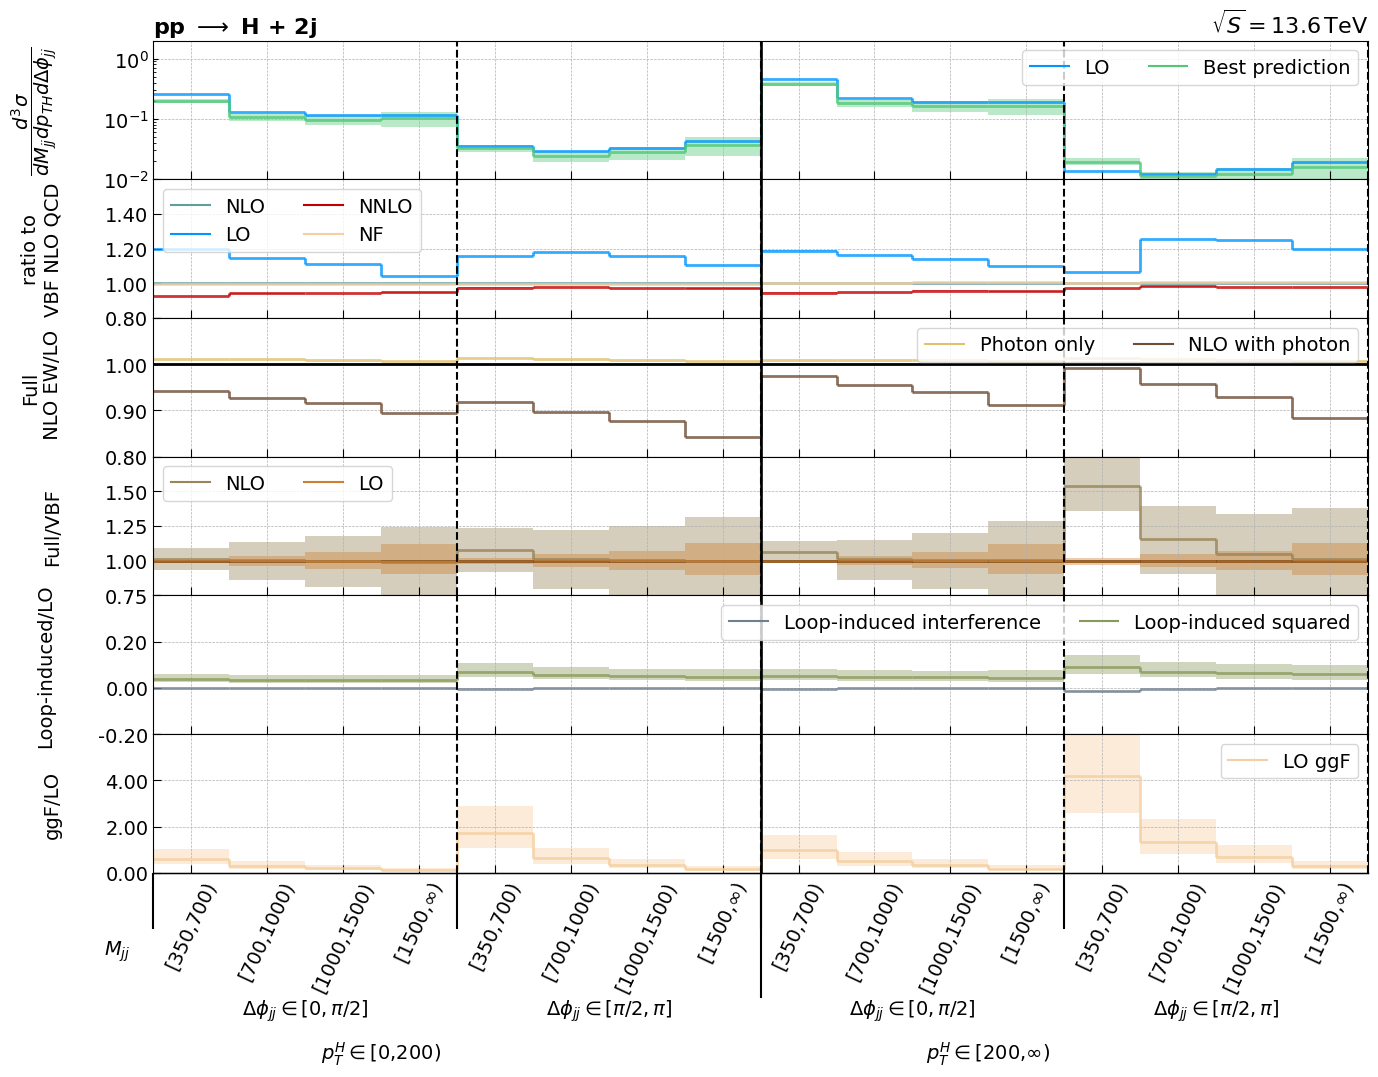

In [29]:
from plotters.histoplotter import HistoPlotter
plotter = HistoPlotter(reader)
#plotter.get_bigstxs_complex_histogram(data, reference_list, label_mapping, 1, 31, 0, 3, settings)
fig = plotter.get_bigstxs_complex_histogram_histogramlike(data, reference_list, label_mapping, 1, Nbins+1, 0, custom_color_map=color_mapping, settings = settings,figsize=figsize)#figsize = (15,12),
plt.savefig(f"FO/{key_to_plot_1}_pTj{setup_pTj}.pdf")
#histo
#get_bigstxs_complex_histogram_histogramlike(data, reference_list, label_mapping, 1, 31, 0, figsize = (14,12),custom_color_map=color_mapping, settings = settings)
#get_bigstxs_complex_histogram_histogramlike(data, reference_list, label_mapping, 350, 1000, 0, custom_color_map=color_mapping)#, settings=settings

### Mjj < 350

In [30]:
mocanlo_nlo_qcd_born, mocanlo_nlo_qcd_nlo, mocanlo_nlo_ew_w_photon_born, mocanlo_nlo_ew_w_photon_nlo, mocanlo_loop_induced, mocanlo_loop_induced_2, mocanlo_nlo_ew_no_photon_nlo, mocanlo_nlo_ew_photon_only, mocanlo_ggF_born = transform_mocanlo_STXS_data(list_mocanlo_data_raw, proVBF_setup, top_data_dict_orig_bin_width, True, merge_DPhijj_pTHjj, True)

In [31]:
data={}
data["x_param"] = mocanlo_nlo_ew_w_photon_born["x_param"]
data["data"] = {}
#print(data["x_param"])
data["other_params"] = []

In [32]:
#sigma_qcd_nlo
mocanlo_qcd_nlo_prediction = red.sum_mocanlo_data(mocanlo_nlo_qcd_born["data"], mocanlo_nlo_qcd_nlo["data"])

one = [(i[0], i[1], 1, 0, 0) for i in mocanlo_qcd_nlo_prediction]

#(1+deltaNLO EW)
delta_ew = red.sum_mocanlo_data(one, mocanlo_nlo_ew_no_photon_nlo["data"])

##Delta photon (quick and dirty rescaling)
#delta_ew_photon_only_1 = mocanlo_nlo_ew_photon_only["data"]
#mocanlo_nlo_ew_photon_only['data'] = [
#    (entry[0], entry[1], entry[2] / 200., entry[3]/200., entry[4]/200.)
#    for entry in mocanlo_nlo_ew_photon_only['data']
#]

best_2 = red.sum_mocanlo_data(red.product_top_mocanlo(mocanlo_qcd_nlo_prediction, delta_ew),
                              mocanlo_nlo_ew_photon_only)

####################################################################################################################

full_nlo_qcd_correction = red.sum_mocanlo_data(one, red.delta_mocanlo(mocanlo_nlo_qcd_nlo["data"], mocanlo_nlo_qcd_born["data"]))

full_nlo_ew_w_photon = red.sum_mocanlo_data(one, red.delta_mocanlo(mocanlo_nlo_ew_w_photon_nlo["data"], mocanlo_nlo_ew_w_photon_born["data"]))
full_nlo_ew_photon_only = red.sum_mocanlo_data(one, red.delta_mocanlo(mocanlo_nlo_ew_photon_only["data"],mocanlo_nlo_ew_w_photon_born["data"]))

mocanlo_correction_and_born = red.sum_mocanlo_data(mocanlo_nlo_qcd_nlo["data"], mocanlo_nlo_qcd_born["data"])
data["data"]["MoCaNLO_LO"] = mocanlo_nlo_ew_w_photon_born["data"]

#delta_ew_photon_only_1 = mocanlo_nlo_ew_photon_only["data"]
#mocanlo_nlo_ew_w_photon_born['data'] = [
#    (entry[0], entry[1], entry[2] / 200., entry[3]/200., entry[4]/200.)
#    for entry in mocanlo_nlo_ew_w_photon_born['data']
#]
#data["data"]["MoCaNLO_NLO_QCD_ratio"] = red.delta_mocanlo(mocanlo_correction_and_born, data["data"]["%s_central_scale_proVBFH_NLO"%proVBF_setup])
#data["data"]["MoCaNLO_LO_QCD_ratio"] = red.delta_mocanlo(mocanlo_nlo_ew_w_photon_born["data"], data["data"]["%s_central_scale_proVBFH_LO"%proVBF_setup])

data["data"]["MoCaNLO_loop_induced"] = mocanlo_loop_induced["data"]
data["data"]["MoCaNLO_loop_induced_2"] = mocanlo_loop_induced_2["data"]
data["data"]["MoCaNLO_ggF_LO"] = mocanlo_ggF_born["data"]

In [33]:
full_nlo_qcd_correction

[(1.0, 2.0, 20.077128918756525, 1.3174641638088032, 1.5972136129579118),
 (2.0, 3.0, 1.1221352964766105, 0.05595109971764214, 0.06273755225619705),
 (3.0, 4.0, 1.1055322162300152, 0.05698880617470258, 0.062220999895261336),
 (4.0, 5.0, 10.502467149078711, 0.703431615890019, 0.8810302060483987),
 (5.0, 6.0, 0.9658478068583457, 0.07618694283106481, 0.09002584366914308),
 (6.0, 7.0, 1.3987130310679712, 0.06875403005813631, 0.08557649371736126)]

In [34]:
data["data"]["best_prediction_final"] = best_2
data["data"]["full_nlo_ew_w_photon"] = full_nlo_ew_w_photon
data["data"]["full_nlo_ew_photon_only"] = full_nlo_ew_photon_only
data["data"]["full_nlo_qcd_correction"] =full_nlo_qcd_correction
data["data"]["mocanlo_qcd_nlo_prediction"] =mocanlo_qcd_nlo_prediction
data["data"]["mocanlo_nlo_qcd_born"] =mocanlo_nlo_qcd_born["data"]

In [35]:
# pTH vs Mjj
reference_list = [ {"data_ind": ["%s_central_scale_proVBFH_LO"%proVBF_setup, "best_prediction_final"],#"best_prediction_1", "best_prediction_2", "best_prediction_3"],
                    "error_bands": True,
                    #"y_scale": (10**(-8),2*10**(-2)),
                    },
                  {"data_ind": ["mocanlo_nlo_qcd_born","mocanlo_qcd_nlo_prediction"],
                   "reference_ind": "mocanlo_nlo_qcd_born",
                    "error_bands": True,
                    "horizontal_line": False,
                    "label": "Full\n NLO QCD/LO",
                    "y_scale": (0.9,21),
                    },
                  
                  {"data_ind": ["full_nlo_ew_photon_only", "full_nlo_ew_w_photon"],
                    "error_bands": False,
                    "horizontal_line": True,
                    "label": "Full\n NLO EW/LO",
                    #"y_scale": (0.7,1.15),
                    },

                    {"data_ind": ["MoCaNLO_loop_induced", "MoCaNLO_loop_induced_2"],
                    "reference_ind": "MoCaNLO_LO",
                    "horizontal_line": False,
                    "label": "Loop Induced/LO",
                    #"y_scale": (-0.0150,0.8000),
                    "error_bands": True,
                    },
                  {"data_ind": ["MoCaNLO_ggF_LO"],#, "MoCaNLO_ggF_LO"],
                    "reference_ind": "MoCaNLO_LO",
                    "horizontal_line": False,
                    "label": "ggF/LO",
                    "y_scale": (-0.0,80.5000),
                    "error_bands": True,
                    }

                 ]

In [36]:
# STXS
#main
reference_list[0]["label"]="$\dfrac{d^2 \sigma}{d M_{jj} d \Delta \phi_{jj}}$"
#reference_list[0]["y_scale"]=(10**(-2),2)
#QCD correction
#reference_list[1]["y_scale"]=(0.8,1.3)
#EW correction
reference_list[2]["y_scale"]=(0.925,1.051)
#Full vs VBF
#reference_list[3]["y_scale"]=(0.9,1.3)
#loop 
#reference_list[4]["y_scale"]=(-0.0030,0.1200) 

settings = {
    "complex_indexes": {
        "small_ticks": ["[0,60)","[60,120)","[120,350)"],
        "small_ticks_rotation": 65,
        "medium_ticks": ["$\Delta \\phi_{jj} \\in[0,\\pi / 2]$", "$\Delta \\phi_{jj} \\in[\pi / 2, \pi]$"],
        "medium_ticks_labelpad": 90,
        #"v_lines": [i + 1 for i in range(4, len(data["data"]["%s_central_scale_proVBFH_NLO_ratio"%proVBF_setup])+1, 4)],
        "big_ticks_xlines": [len(full_nlo_ew_photon_only)/2 + 1],
    },
    "x_param_labelpad": -40,
    "x_param_label": "$M_{jj}$",
    "x_param_position": -0.03,
    "left_title": r"pp $\longrightarrow$ H + 2j",
    "right_title": r"$\sqrt{S} = 13.6\,\mathrm{TeV}$",

}

here7


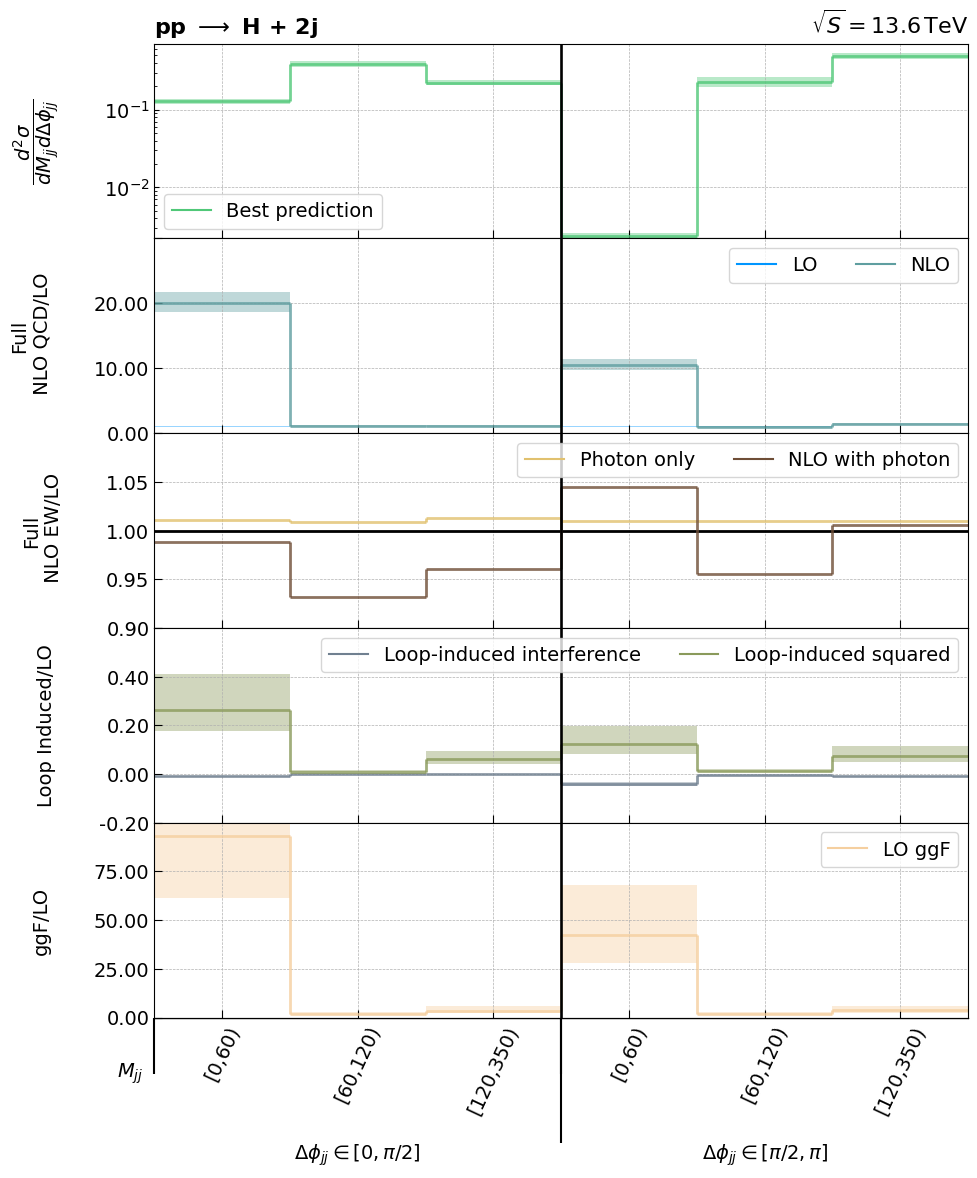

In [37]:
from plotters.histoplotter import HistoPlotter
plotter = HistoPlotter(reader)
#plotter.get_bigstxs_complex_histogram(data, reference_list, label_mapping, 1, 31, 0, 3, settings)

fig = plotter.get_bigstxs_complex_histogram_histogramlike(data, reference_list, label_mapping, 1, 7, 0, custom_color_map=color_mapping, settings = settings)#figsize = (15,12),
plt.savefig(f"FO/mjj_smaller_than_350.pdf")


In [38]:
mocanlo_nlo_qcd_born, mocanlo_nlo_qcd_nlo, mocanlo_nlo_ew_w_photon_born, mocanlo_nlo_ew_w_photon_nlo, mocanlo_loop_induced, mocanlo_loop_induced_2, mocanlo_nlo_ew_no_photon_nlo, mocanlo_nlo_ew_photon_only, mocanlo_ggF_born = transform_mocanlo_STXS_data(list_mocanlo_data_raw, proVBF_setup, top_data_dict_orig_bin_width, False, merge_DPhijj_pTHjj, True)

In [39]:
data={}
data["x_param"] = mocanlo_nlo_ew_w_photon_born["x_param"]
data["data"] = {}
#print(data["x_param"])
data["other_params"] = []

In [40]:
#sigma_qcd_nlo
mocanlo_qcd_nlo_prediction = red.sum_mocanlo_data(mocanlo_nlo_qcd_born["data"], mocanlo_nlo_qcd_nlo["data"])

one = [(i[0], i[1], 1, 0, 0) for i in mocanlo_qcd_nlo_prediction]

#(1+deltaNLO EW)
delta_ew = red.sum_mocanlo_data(one, mocanlo_nlo_ew_no_photon_nlo["data"])

##Delta photon (quick and dirty rescaling)
#delta_ew_photon_only_1 = mocanlo_nlo_ew_photon_only["data"]
#mocanlo_nlo_ew_photon_only['data'] = [
#    (entry[0], entry[1], entry[2] / 200., entry[3]/200., entry[4]/200.)
#    for entry in mocanlo_nlo_ew_photon_only['data']
#]

best_2 = red.sum_mocanlo_data(red.product_top_mocanlo(mocanlo_qcd_nlo_prediction, delta_ew),
                              mocanlo_nlo_ew_photon_only)

####################################################################################################################

full_nlo_ew_w_photon = red.sum_mocanlo_data(one, red.delta_mocanlo(mocanlo_nlo_ew_w_photon_nlo["data"], mocanlo_nlo_ew_w_photon_born["data"]))
full_nlo_ew_photon_only = red.sum_mocanlo_data(one, red.delta_mocanlo(mocanlo_nlo_ew_photon_only["data"],mocanlo_nlo_ew_w_photon_born["data"]))

mocanlo_correction_and_born = red.sum_mocanlo_data(mocanlo_nlo_qcd_nlo["data"], mocanlo_nlo_qcd_born["data"])
data["data"]["MoCaNLO_LO"] = mocanlo_nlo_ew_w_photon_born["data"]

#delta_ew_photon_only_1 = mocanlo_nlo_ew_photon_only["data"]
#mocanlo_nlo_ew_w_photon_born['data'] = [
#    (entry[0], entry[1], entry[2] / 200., entry[3]/200., entry[4]/200.)
#    for entry in mocanlo_nlo_ew_w_photon_born['data']
#]
#data["data"]["MoCaNLO_NLO_QCD_ratio"] = red.delta_mocanlo(mocanlo_correction_and_born, data["data"]["%s_central_scale_proVBFH_NLO"%proVBF_setup])
#data["data"]["MoCaNLO_LO_QCD_ratio"] = red.delta_mocanlo(mocanlo_nlo_ew_w_photon_born["data"], data["data"]["%s_central_scale_proVBFH_LO"%proVBF_setup])

data["data"]["MoCaNLO_loop_induced"] = mocanlo_loop_induced["data"]
data["data"]["MoCaNLO_loop_induced_2"] = mocanlo_loop_induced_2["data"]

In [41]:
data["data"]["best_prediction_final"] = best_2
data["data"]["full_nlo_ew_w_photon"] = full_nlo_ew_w_photon
data["data"]["full_nlo_ew_photon_only"] = full_nlo_ew_photon_only


In [42]:
# STXS
#main
reference_list[0]["label"]="$\dfrac{d^3 \sigma}{d M_{jj} d p_{TH} d \Delta \phi_{jj}}$"
#reference_list[0]["y_scale"]=(10**(-2),2)
#QCD correction
try:
    reference_list[1].pop("y_scale")
except:
    pass
#EW correction
reference_list[2]["y_scale"]=(0.9,1.01)
#Full vs VBF
#reference_list[3]["y_scale"]=(0.9,1.3)
#loop 
#reference_list[4]["y_scale"]=(-0.0030,0.1200) 
#ggF
try:
    reference_list[5].pop("y_scale")
except:
    pass

settings = {
    "complex_indexes": {
        "small_ticks": ["[0,60)","[60,120)","[120,350)"],
        "small_ticks_rotation": 65,
        "medium_ticks": ["$p_{T,Hjj} \\in[0,25]$", "$p_{T,Hjj} \\in[25,\\inf]$", 
                         "$p_{T,Hjj} \\in[0,25]$", "$p_{T,Hjj} \\in[25,\\inf]$"],
        "medium_ticks_labelpad": 90,
        "big_ticks": ["$\Delta \\phi_{jj} \\in[0,\\pi / 2]$", "$\Delta \\phi_{jj} \\in[\pi / 2, \pi]$"],
        "v_lines": [i + 1 for i in range(3, len(full_nlo_ew_photon_only), 3)],
        "big_ticks_xlines": [len(full_nlo_ew_photon_only)/2 + 1],
    },
    "x_param_labelpad": -40,
    "x_param_label": "$M_{jj}$",
    "x_param_position": -0.03,
    "left_title": r"pp $\longrightarrow$ H + 2j",
    "right_title": r"$\sqrt{S} = 13.6\,\mathrm{TeV}$",

}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


here7


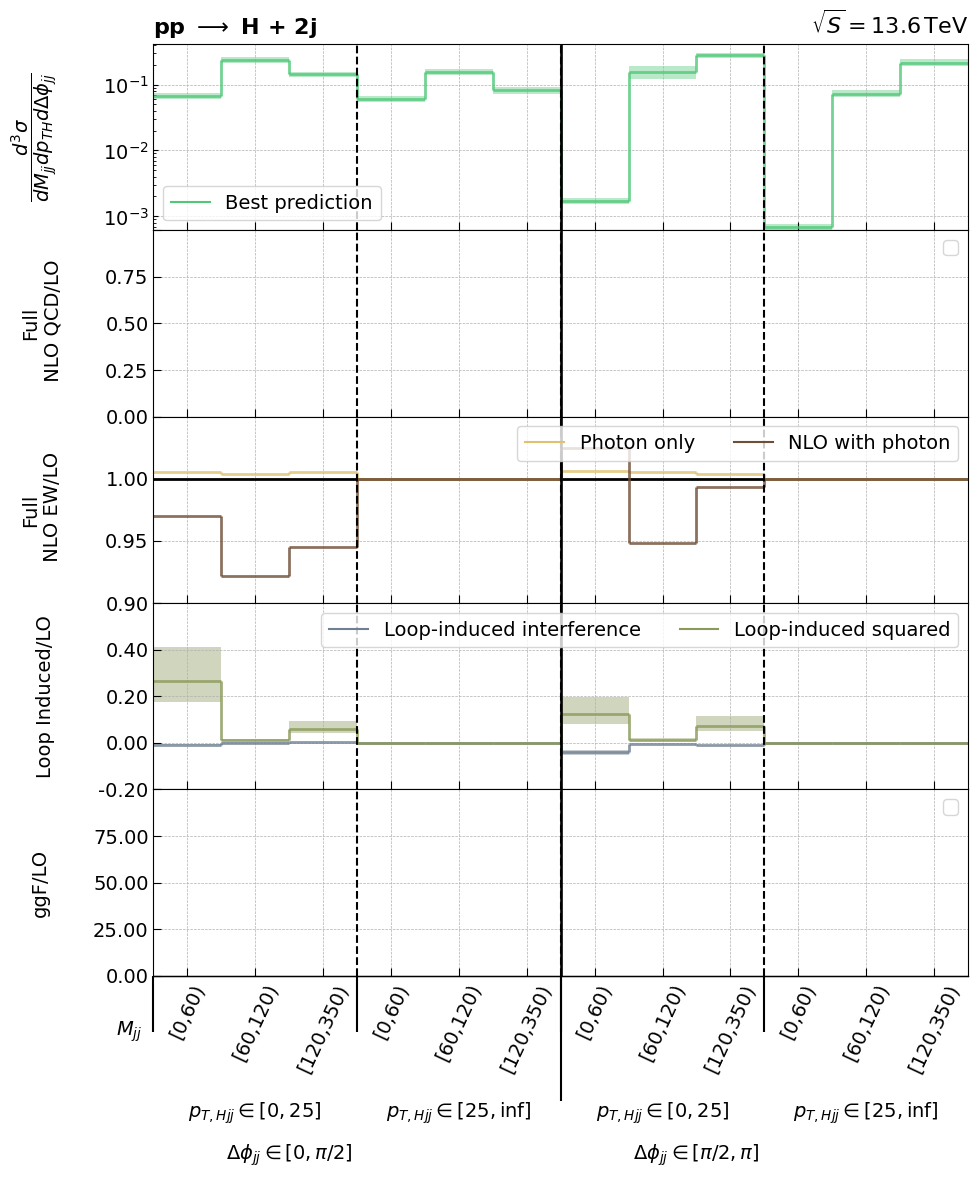

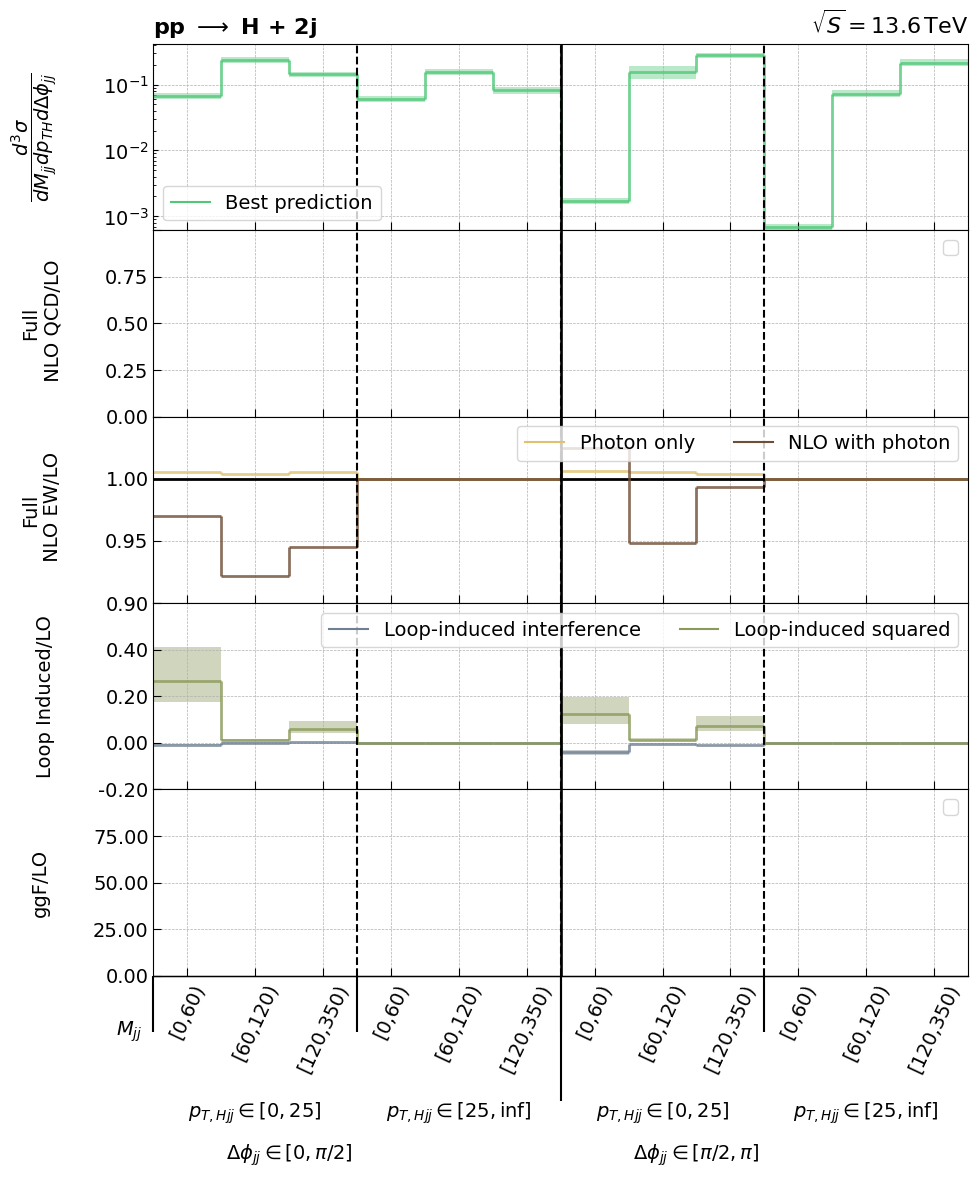

In [43]:
from plotters.histoplotter import HistoPlotter
plotter = HistoPlotter(reader)
#plotter.get_bigstxs_complex_histogram(data, reference_list, label_mapping, 1, 31, 0, 3, settings)
plotter.get_bigstxs_complex_histogram_histogramlike(data, reference_list, label_mapping, 1, 13, 0, custom_color_map=color_mapping, settings = settings)#figsize = (15,12),


In [44]:
mocanlo_ggF_born["data"]

[(1.0, 2.0, 0.5940263232556482, 0.20534086373807622, 0.34876000127110524),
 (2.0, 3.0, 0.6206085209071479, 0.21773546327743357, 0.3738528279295339),
 (3.0, 4.0, 0.7180090078343001, 0.2586027947954026, 0.452636974425631),
 (4.0, 5.0, 0.0, 0.0, 0.0),
 (5.0, 6.0, 0.0, 0.0, 0.0),
 (6.0, 7.0, 0.0, 0.0, 0.0),
 (7.0, 8.0, 0.009695978616987245, 0.003292305467708579, 0.005749945067843544),
 (8.0, 9.0, 0.42833695995709886, 0.1469559285170406, 0.2529603880217819),
 (9.0, 10.0, 1.295573685875568, 0.46317700601273964, 0.8067760281784969),
 (10.0, 11.0, 0.0, 0.0, 0.0),
 (11.0, 12.0, 0.0, 0.0, 0.0),
 (12.0, 13.0, 0.0, 0.0, 0.0)]